1.1 Biến đổi cường độ ảnh

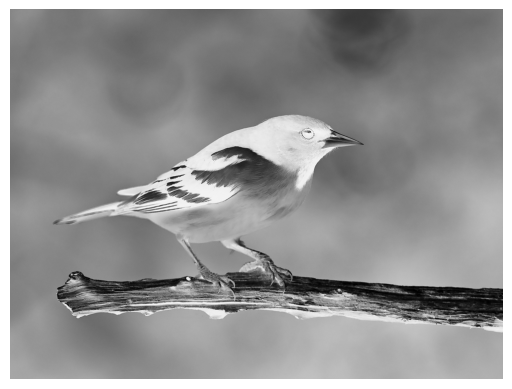

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
im_2 = 255 - im_1
new_img = Image.fromarray(im_2)
new_img.show()
plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.show()


1.2 Thay đổi chất lượng với power-law


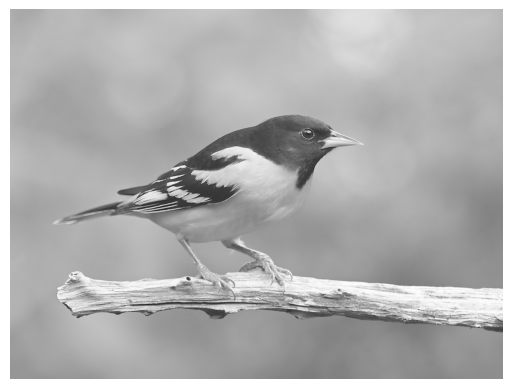

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
gamma = 0.5
b1 = im_1.astype(float)
b2 = np.max(b1)
b3 = b1 / b2
b4 = np.log(b3 + 1e-8) * gamma
c = np.exp(b4) * 255.0
cl = np.clip(c, 0, 255).astype(np.uint8)
d = Image.fromarray(cl)
d.show()
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()


1.3 Thay đổi cường độ ddiemr ảnh với Log Transformation

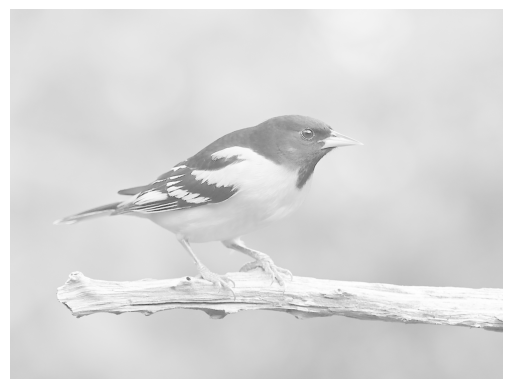

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
im_1 = np.asarray(img)
b1 = im_1.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
cl = np.clip(c, 0, 255).astype(np.uint8)
d = Image.fromarray(cl)
d.show()
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()


1.4 histogram equalization

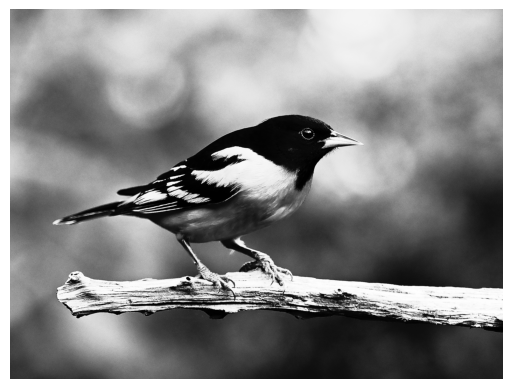

In [6]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
b1 = im1.flatten()

hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)

num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = cdf_m.max() - cdf_m.min()
cdf_m = num_cdf_m / den_cdf_m

cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.axis('off')
plt.show()


1.5 contrast stretching

0 255


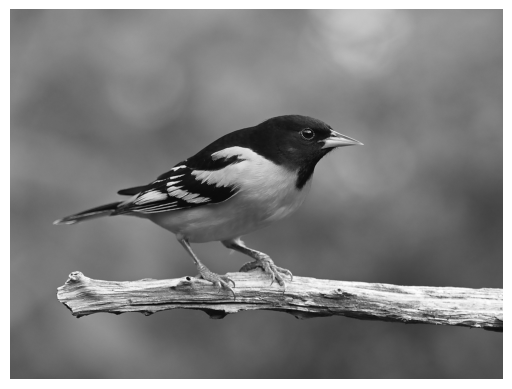

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)

b = im1.max()
a = im1.min()
print(a, b)

c = im1.astype(float)
im2 = 255 * (c - a) / (b - a)
im2 = np.clip(im2, 0, 255).astype(np.uint8)

im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.axis('off')
plt.show()


1.6.1 biến đổi ảnh với Fast Fourier

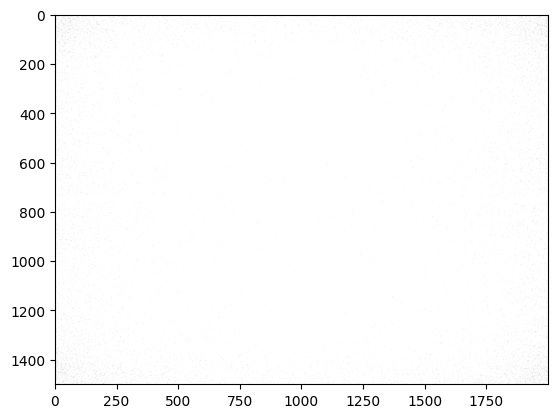

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()


1.6.2 lọc ảnh trong miền tần suất

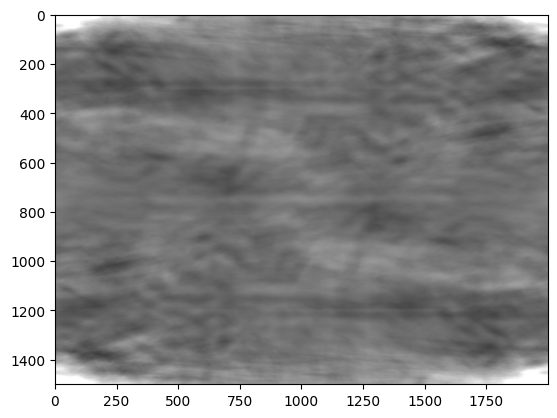

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M= d.shape[0]
N= d.shape[1]
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
d0 = 30.0  
t1=1
t2=2*t1     
for i in range(1,M):
    for j in range(1,N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d0:
            H[i, j] = 1/ (1+(r/d0)**t1)
H = H.astype(float)
H= Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)
img.show()
im3.show()
plt.imshow(im3)
plt.show()


bài tập 1

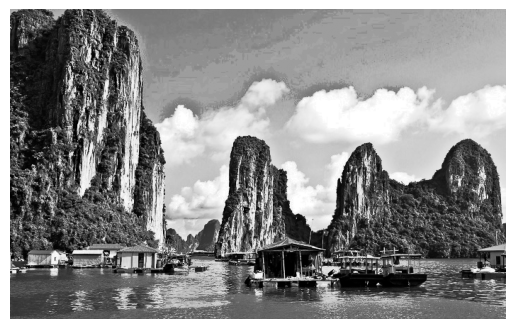

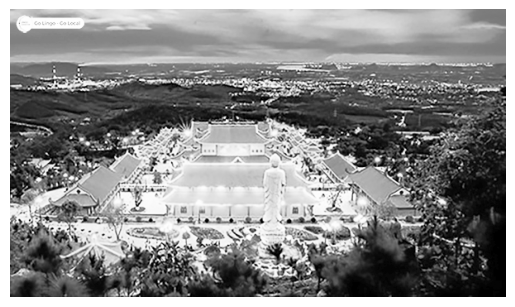

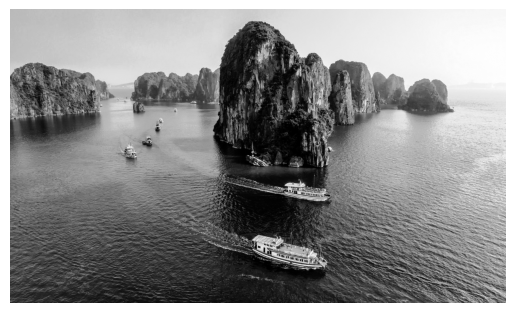

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
def image_inverse(img):
    im = np.asarray(img)
    out = 255 - im
    out = Image.fromarray(out)
    return out
def gamma_correction(img):
    gamma = 0.5
    im = np.asarray(img)
    b1 = im.astype(float)
    b2 = np.max(b1)
    b3 = b1 / b2
    b4 = np.log(b3 + 1e-8) * gamma
    c = np.exp(b4) * 255.0
    cl = np.clip(c, 0, 255).astype(np.uint8)
    out = Image.fromarray(cl)
    return out
def log_transform(img):
    im = np.asarray(img)
    b1 = im.astype(float)
    b2 = np.max(b1)
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    cl = np.clip(c, 0, 255).astype(np.uint8)
    out = Image.fromarray(cl)
    return out
def histogram_equalization(img):
    im = np.asarray(img)
    b1 = im.flatten()
    hist, bins = np.histogram(im, 256, [0, 255])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    num_cdf_m = (cdf_m - cdf_m.min()) * 255
    den_cdf_m = cdf_m.max() - cdf_m.min()
    cdf_m = num_cdf_m / den_cdf_m
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    im2 = cdf[b1]
    im3 = np.reshape(im2, im.shape)
    out = Image.fromarray(im3)
    return out
def contrast_stretching(img):
    im = np.asarray(img)
    b = im.max()
    a = im.min()
    c = im.astype(float)
    im2 = 255 * (c - a) / (b - a)
    im2 = np.clip(im2, 0, 255).astype(np.uint8)
    out = Image.fromarray(im2)
    return out
methods = {
    'I': image_inverse,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}
folder = 'exercise'
output = 'output1'
os.makedirs(output, exist_ok=True)
key = input('Nhập phím (I, G, L, H, C): ').upper()
for file in os.listdir(folder):
    path = os.path.join(folder, file)
    img = Image.open(path).convert('L')
    out = methods[key](img)
    out.save(os.path.join(output, 'out_' + file))
    plt.imshow(out, cmap='gray')
    plt.axis('off')
    plt.show()


BÀI TẬP 2


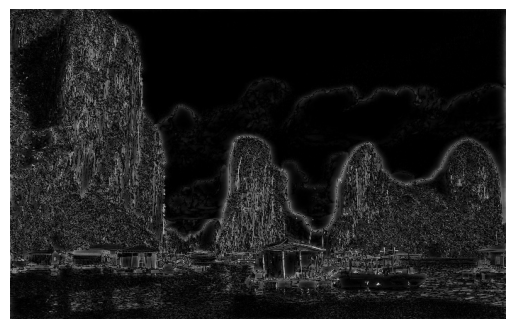

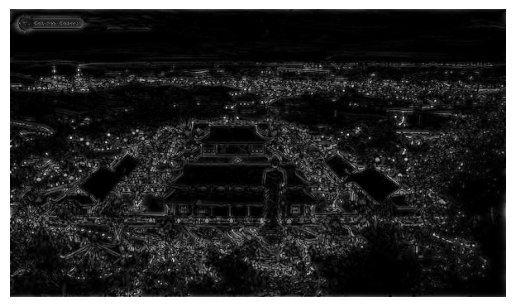

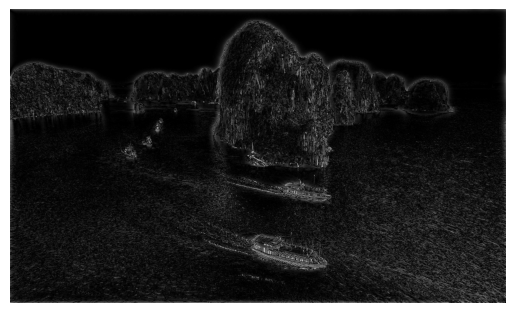

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
folder = 'exercise'
output = 'output2'
os.makedirs(output, exist_ok=True)
def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = 20 * np.log(np.abs(fshift) + 1)
    mag = np.clip(mag, 0, 255).astype(np.uint8)
    return Image.fromarray(mag)
def butter_low(img):
    r, c = img.shape
    x = np.arange(r)
    y = np.arange(c)
    x, y = np.meshgrid(x - r//2, y - c//2, indexing='ij')
    d = np.sqrt(x**2 + y**2)
    h = 1 / (1 + (d / 30)**2)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fnew = fshift * h
    ishift = np.fft.ifftshift(fnew)
    inv = np.abs(np.fft.ifft2(ishift))
    out = np.clip(inv, 0, 255).astype(np.uint8)
    return Image.fromarray(out)
def butter_high(img):
    r, c = img.shape
    x = np.arange(r)
    y = np.arange(c)
    x, y = np.meshgrid(x - r//2, y - c//2, indexing='ij')
    d = np.sqrt(x**2 + y**2)
    h = 1 / (1 + (30 / (d + 1e-8))**2)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fnew = fshift * h
    ishift = np.fft.ifftshift(fnew)
    inv = np.abs(np.fft.ifft2(ishift))
    out = np.clip(inv, 0, 255).astype(np.uint8)
    return Image.fromarray(out)
f_key = input('Nhap F, L, H: ').upper()
for file in os.listdir(folder):
    img = Image.open(os.path.join(folder, file)).convert('L')
    arr = np.asarray(img)
    if f_key == 'F':
        out = fast_fourier(arr)
    elif f_key == 'L':
        out = butter_low(arr)
    elif f_key == 'H':
        out = butter_high(arr)
    else:
        continue
    out.save(os.path.join(output, 'out_' + file))
    plt.imshow(out, cmap='gray')
    plt.axis('off')
    plt.show()

BÀI TẬP 3

Sử dụng phép biến đổi: L


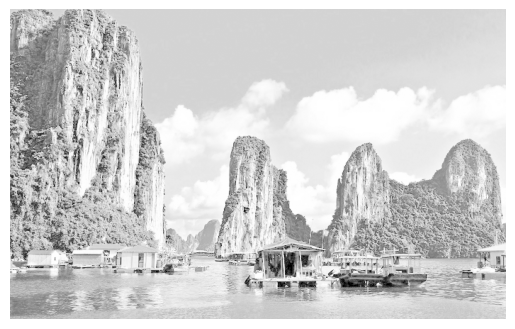

Sử dụng phép biến đổi: H


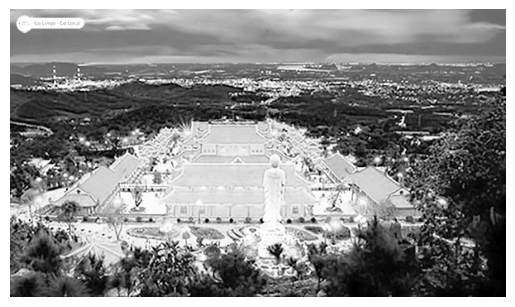

Sử dụng phép biến đổi: C


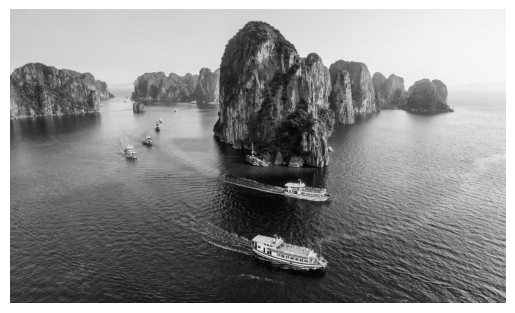

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
folder = 'exercise'
output = 'output3'
os.makedirs(output, exist_ok=True)
def I(img):
    return Image.fromarray(255 - np.asarray(img))
def G(img):
    arr = np.asarray(img).astype(float)
    arr = arr / 255.0
    out = np.power(arr, 1/2.2) * 255
    return Image.fromarray(np.clip(out, 0, 255).astype(np.uint8))
def L(img):
    arr = np.asarray(img).astype(float)
    out = (128.0 * np.log(1 + arr)) / np.log(1 + np.max(arr))
    return Image.fromarray(np.clip(out, 0, 255).astype(np.uint8))
def H(img):
    arr = np.asarray(img)
    flat = arr.flatten()
    hist, _ = np.histogram(flat, 256, [0, 255])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    result = cdf[flat]
    result = np.reshape(result, arr.shape)
    return Image.fromarray(result)
def C(img):
    arr = np.asarray(img)
    out = 255 * (arr.astype(float) - arr.min()) / (arr.max() - arr.min())
    return Image.fromarray(np.clip(out, 0, 255).astype(np.uint8))
methods = [I, G, L, H, C]
for file in os.listdir(folder):
    path = os.path.join(folder, file)
    img = Image.open(path).convert('RGB')
    img = img.convert('RGB')
    r, g, b = img.split()
    img = Image.merge('RGB', (b, r, g))
    gray = img.convert('L')
    f = random.choice(methods)
    print("Sử dụng phép biến đổi:", f.__name__)
    out = f(gray)
    out.save(os.path.join(output, 'out_' + file))
    plt.imshow(out, cmap='gray')
    plt.axis('off')
    plt.show()

BÀI TẬP 4

Sử dụng filter: butter_high


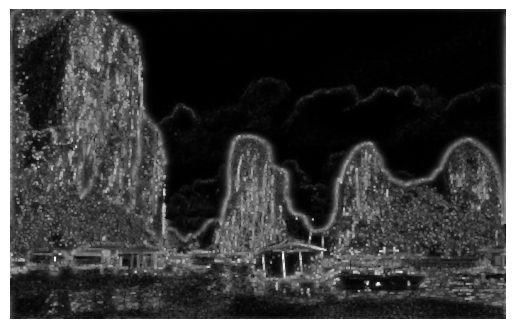

Sử dụng filter: butter_low


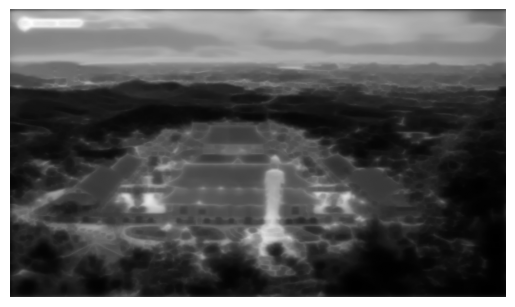

Sử dụng filter: fast_fourier


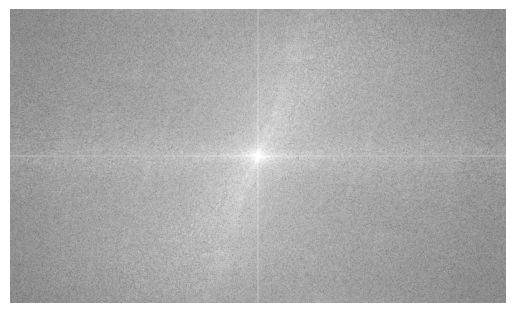

In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy.ndimage import minimum_filter, maximum_filter
folder = 'exercise'
output = 'output4'
os.makedirs(output, exist_ok=True)
def butter_low(img):
    r, c = img.shape
    x = np.arange(r)
    y = np.arange(c)
    x, y = np.meshgrid(x - r//2, y - c//2, indexing='ij')
    d = np.sqrt(x**2 + y**2)
    h = 1 / (1 + (d / 30)**2)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fnew = fshift * h
    ishift = np.fft.ifftshift(fnew)
    inv = np.abs(np.fft.ifft2(ishift))
    out = np.clip(inv, 0, 255).astype(np.uint8)
    out = minimum_filter(out, size=3)
    return Image.fromarray(out)
def butter_high(img):
    r, c = img.shape
    x = np.arange(r)
    y = np.arange(c)
    x, y = np.meshgrid(x - r//2, y - c//2, indexing='ij')
    d = np.sqrt(x**2 + y**2)
    h = 1 / (1 + (30 / (d + 1e-8))**2)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fnew = fshift * h
    ishift = np.fft.ifftshift(fnew)
    inv = np.abs(np.fft.ifft2(ishift))
    out = np.clip(inv, 0, 255).astype(np.uint8)
    out = maximum_filter(out, size=3)
    return Image.fromarray(out)
def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = 20 * np.log(np.abs(fshift) + 1)
    mag = np.clip(mag, 0, 255).astype(np.uint8)
    return Image.fromarray(mag)
filters = [fast_fourier, butter_low, butter_high]
for file in os.listdir(folder):
    path = os.path.join(folder, file)
    img = Image.open(path).convert('RGB')
    r, g, b = img.split()
    img = Image.merge('RGB', (g, b, r))
    gray = img.convert('L')
    f = random.choice(filters)
    print("Sử dụng filter:", f.__name__)
    out = f(np.asarray(gray))
    out.save(os.path.join(output, 'out_' + file))
    plt.imshow(out, cmap='gray')
    plt.axis('off')
    plt.show()